In [1]:
import pandas as pd
import numpy as np


In [2]:
#reading the dataset
try:
    
    dataset=pd.read_csv("spam.csv",encoding='iso-8859-1')
except FileNotFoundError:
    print("File Not found error")
except UnicodeDecodeError as e:
    print(f'Error decoding :{e}')

In [3]:
dataset.shape

(5572, 5)

In [4]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# 1.data cleaning
# 2.EDA
# 3.Text preprocessing
# 4.model building
# 5.evaluation
# 6.improvement 
# 7.website
# 8.deploy

# 1.data cleaning

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
dataset=dataset.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"]) #drop last 3 columns because it contain very less data


In [8]:
#renaming the columns
dataset.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [9]:
dataset.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
dataset["target"]=encoder.fit_transform(dataset['target'])

In [12]:
dataset.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#checking missing value
dataset.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate value
dataset.duplicated().sum()

403

In [15]:
#remove duplicate value
dataset=dataset.drop_duplicates(keep="first")

In [16]:
dataset.duplicated().sum()

0

In [17]:
# checking the shape of dataset after cleanig data
dataset.shape

(5169, 2)

# 2.EDA 

In [18]:
dataset.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
dataset["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [20]:
#visulazation
import matplotlib.pyplot as plt

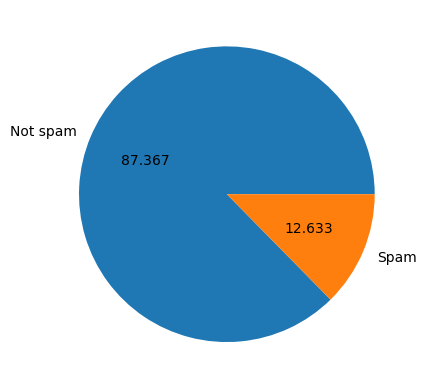

In [21]:
plt.pie(dataset["target"].value_counts(),labels=["Not spam","Spam"],autopct="%.3f")
plt.show() #to remove the extra piece of code


In [22]:
#data is imbalance


In [23]:
dataset['num_character']=dataset["text"].apply(len)

In [24]:
dataset.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# !pip install nltk

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
#num of words


In [28]:
dataset["text"].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [29]:
#coputinf the numof word in any sentences


In [30]:
dataset["num_of_words"]=dataset["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
dataset.head()

,target,text,num_character,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
#NUM OF SENTENCEA
dataset["num_sen"]=dataset["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
dataset.head()

,target,text,num_character,num_of_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
dataset[["num_character","num_of_words","num_sen"]].describe()

,num_character,num_of_words,num_sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [35]:
import seaborn as sns


In [36]:
#analysiis of both ham and spam message differnetly 
#for ham
dataset[dataset["target"]==0][["num_character","num_of_words","num_sen"]]

,num_character,num_of_words,num_sen
0,111,24,2
1,29,8,2
3,49,13,1
4,61,15,1
6,77,18,2
...,...,...,...
5565,12,4,1
5568,37,9,1
5569,57,15,2
5570,125,27,1


In [37]:
#for spam
dataset[dataset["target"]==1][["num_character","num_of_words","num_sen"]]

,num_character,num_of_words,num_sen
2,155,37,2
5,148,39,4
8,158,32,5
9,154,31,3
11,136,31,3
...,...,...,...
5537,90,18,3
5540,160,38,6
5547,160,35,5
5566,147,30,1


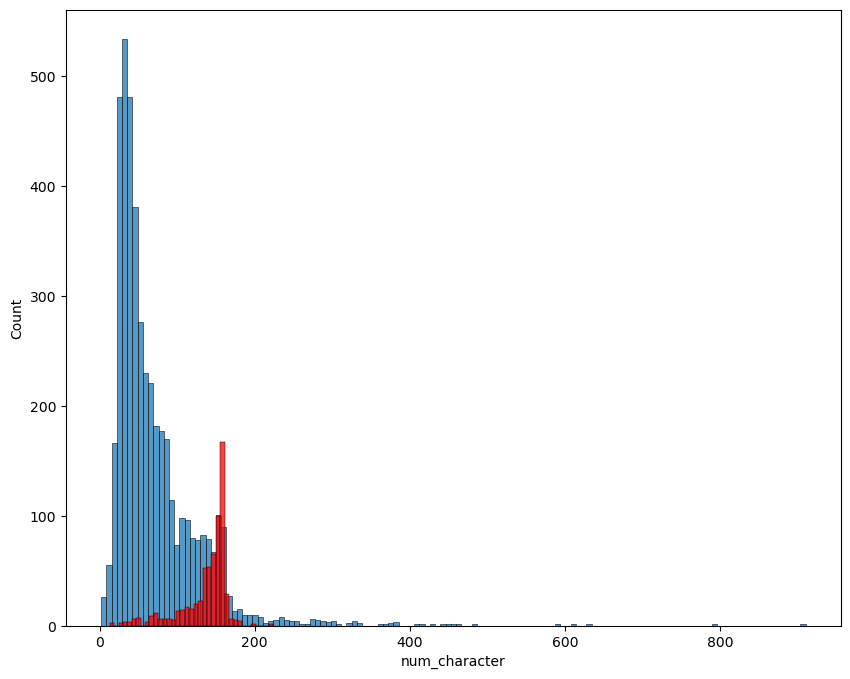

In [38]:
#visulaization
plt.figure(figsize=(10,8))
sns.histplot(dataset[dataset["target"]==0]["num_character"])
sns.histplot(dataset[dataset["target"]==1]["num_character"],color='red')
plt.show()

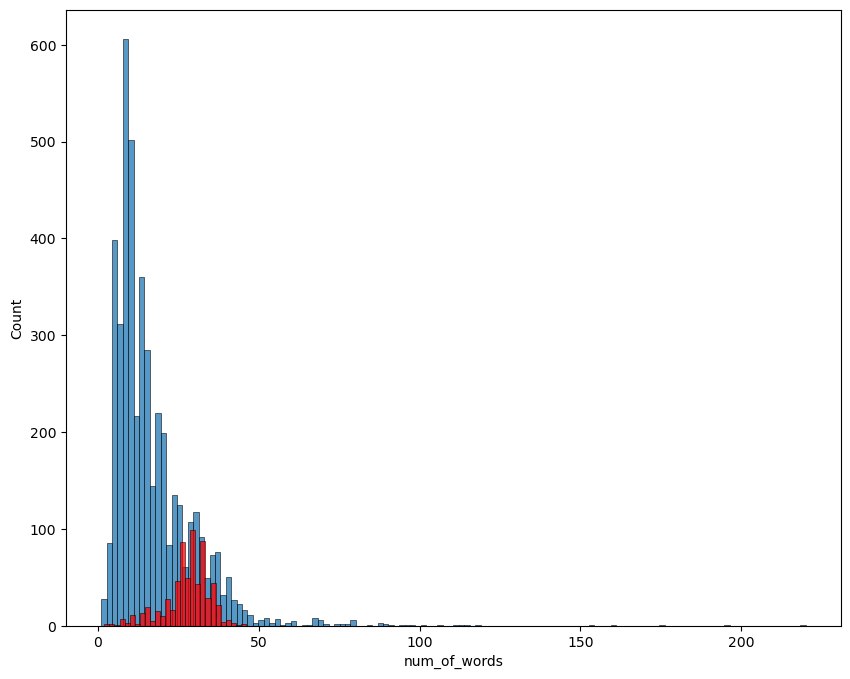

In [39]:
plt.figure(figsize=(10,8))
sns.histplot(dataset[dataset["target"]==0]["num_of_words"])
sns.histplot(dataset[dataset["target"]==1]["num_of_words"],color='red')
plt.show()

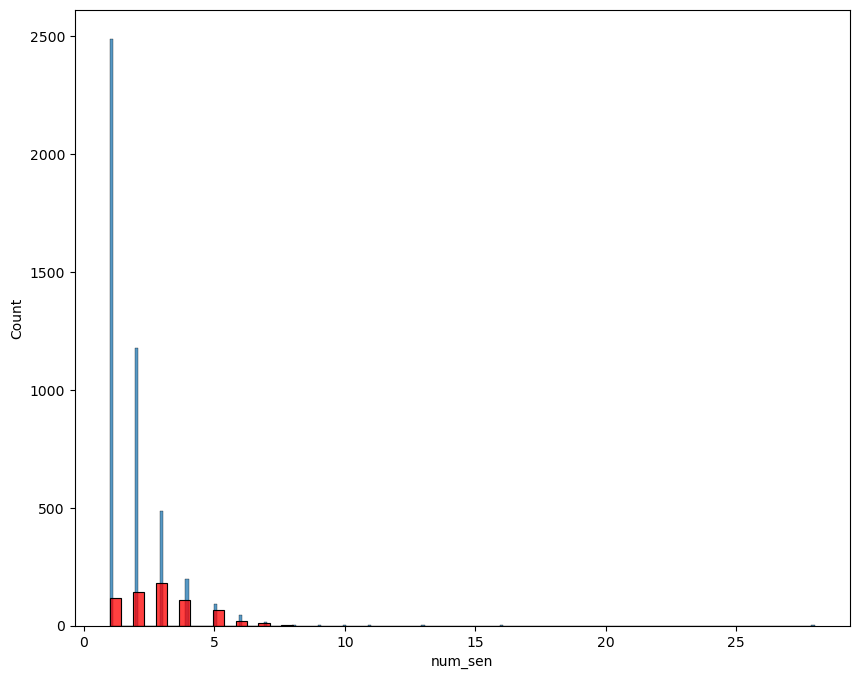

In [40]:
plt.figure(figsize=(10,8))
sns.histplot(dataset[dataset["target"]==0]["num_sen"])
sns.histplot(dataset[dataset["target"]==1]["num_sen"],color='red')
plt.show()

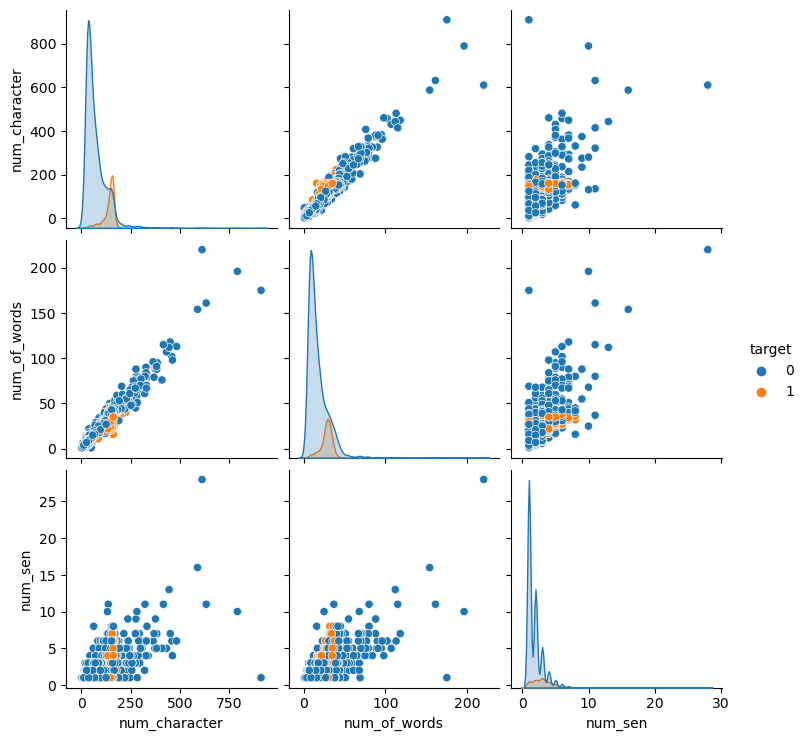

In [41]:
sns.pairplot(dataset,hue='target')

In [42]:
#getting the correlation coeffieceint
dataset.corr()

C:\Users\Acer\AppData\Local\Temp\ipykernel_700\616400433.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,target,num_character,num_of_words,num_sen
target,1.000000,0.384717,0.262984,0.284901
num_character,0.384717,1.000000,0.965770,0.638143
num_of_words,0.262984,0.965770,1.000000,0.684541
num_sen,0.284901,0.638143,0.684541,1.000000


C:\Users\Acer\AppData\Local\Temp\ipykernel_700\3387572453.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

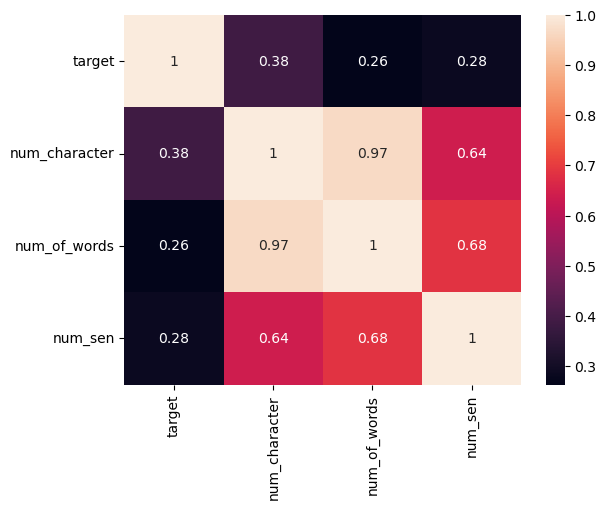

In [43]:
sns.heatmap(dataset.corr(),annot=True)

In [44]:
#about the stemming word
from nltk.corpus import stopwords
stopwords.words('english')

#about the punctuation
import string
string.punctuation

#about stemming of the word
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [45]:
def text_transform(text):
    text_lower=text.lower() #changing all chaarcter into lower
#     print(f'text_in_lower={text_lower}')
    
    text_break_word=nltk.word_tokenize(text_lower)#breaking all the sentence into word and store in list 
#     print(f'text_break_word={text_break_word}')
    
    #TEXT WITHOUT SPECIAL  CHARACTER
    text_without_spec_char=[]
    for i in text_break_word:
        if  i.isalnum():
            text_without_spec_char.append(i) #REMOVING THE SPECIAL CHARACTER
#     print(f'text_without_spec_char={text_without_spec_char}') 
    
    
    #REMOVING  THE stopword and punctuation
    text_without_stopword_punc=[]
    for i in text_without_spec_char:
        if i not in stopwords.words("english") and i not in string.punctuation:
            text_without_stopword_punc.append(i)
#     print(f'text_without_stopword_punc={text_without_stopword_punc}')
        
        
    #removig stemming 
    text_without_stemming=[]
    for i in text_without_stopword_punc:
        text_without_stemming.append(ps.stem(i))
        
#     print(f'text_without_stemming={text_without_stemming}') 
            
    return " ".join(text_without_stemming)

    

In [46]:
text_transform(dataset["text"][10])


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [47]:
dataset.head()

,target,text,num_character,num_of_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [48]:
#getting the transform column
dataset["text"].apply(text_transform)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [49]:
dataset["transformed_text"]=dataset["text"].apply(text_transform)

In [50]:
dataset.head()

,target,text,num_character,num_of_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
dataset.head()

,target,text,num_character,num_of_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

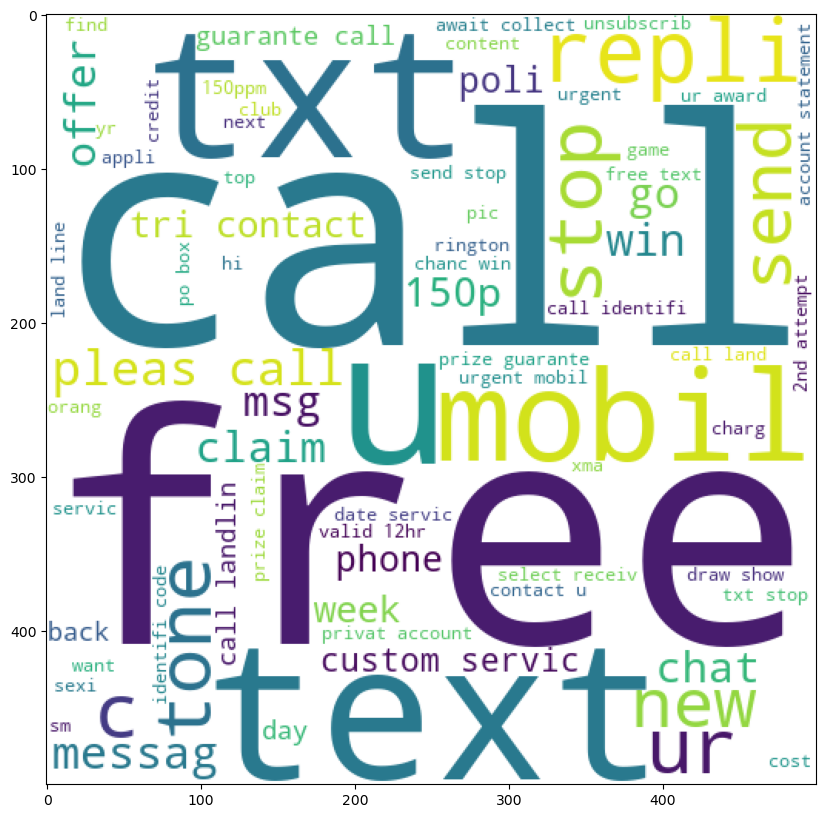

In [53]:
#word clod for the spam sms

spam_wc=wc.generate(dataset[dataset["target"]==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,10))
plt.imshow(spam_wc)
plt.show()

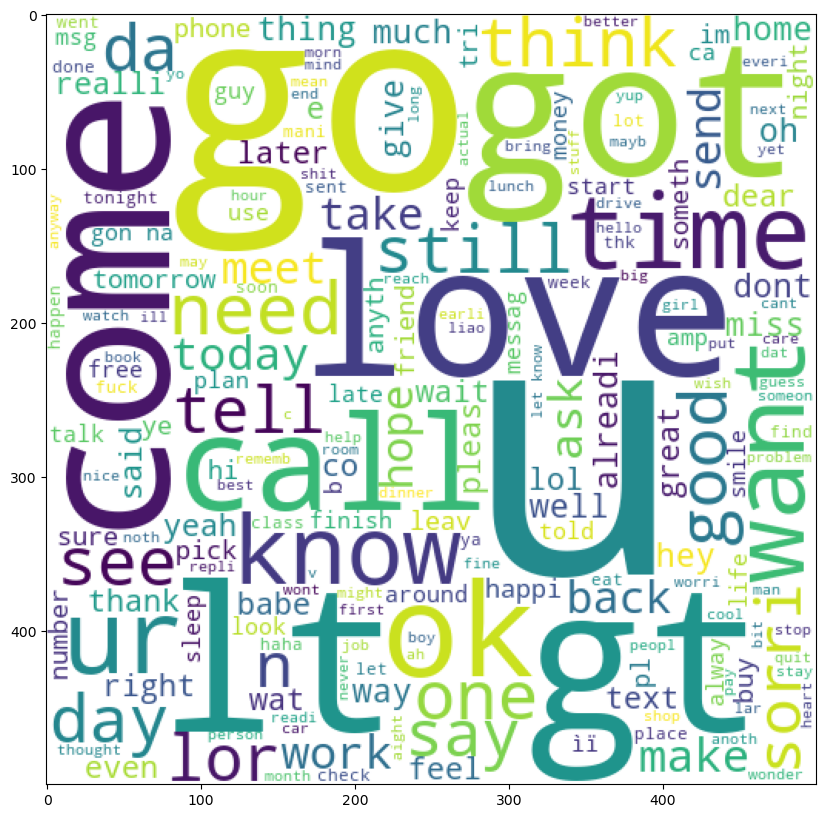

In [54]:
#word clod for the ham sms

ham_wc=wc.generate(dataset[dataset["target"]==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,10))
plt.imshow(ham_wc)
plt.show()

In [55]:
#top 30 word in spam
dataset.head()
all_text_in_spam=dataset[dataset['target']==1]["transformed_text"].tolist()

spam_sms=[]
for msg in all_text_in_spam:
    for word in  msg.split():
        
        spam_sms.append(word)


In [56]:
len(spam_sms)

9939

In [57]:
from collections import Counter
count_spam_df=pd.DataFrame(Counter(spam_sms).most_common(30))

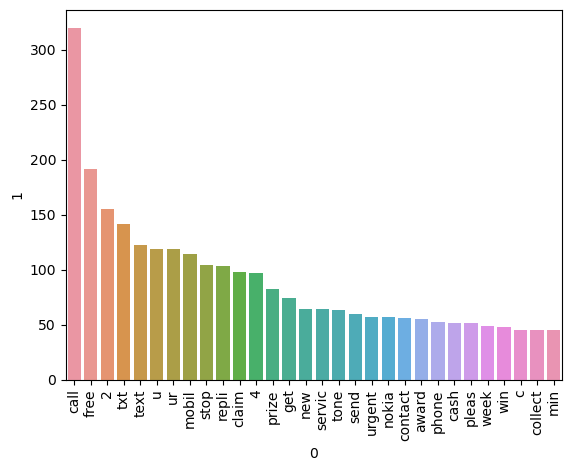

In [58]:
#plot of the number os most occuring word
sns.barplot(x=count_spam_df[0],y=count_spam_df[1])
plt.xticks(rotation="vertical")
plt.show()

In [59]:
#top 30 for ham
all_text_ham=dataset[dataset["target"]==0]["transformed_text"].tolist()
all_text_ham

ham_sms=[]
for sms in all_text_ham:
    for word in sms.split():
        ham_sms.append(word)
            
            

In [60]:
#length of ham message

len(ham_sms)

35394

In [61]:
from collections import Counter
count_ham_df=pd.DataFrame(Counter(ham_sms).most_common(30))

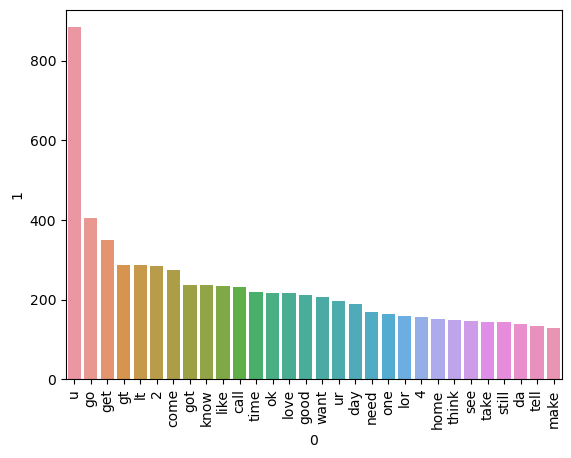

In [62]:
sns.barplot(x=count_ham_df[0],y=count_ham_df[1])
plt.xticks(rotation="vertical")
plt.show()

# 4.model Building


In [102]:
dataset.head()

,target,text,num_character,num_of_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [103]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfd=TfidfVectorizer(max_features=3000)

In [104]:
#using CountVectorizer
# X=cv.fit_transform(dataset["transformed_text"]).toarray()
# print(X.shape)
# y=dataset["target"].values
# print(y)

#using TfidfVectorizer
X=tfd.fit_transform(dataset["transformed_text"]).toarray()
print(X.shape)
y=dataset["target"].values
print(y)


#

(5169, 3000)
[0 0 1 ... 0 0 0]


In [105]:
#train test split
from sklearn.model_selection import train_test_split


In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=2)

In [107]:
#model training
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [108]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [109]:
#accuracy

gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(f'accuracy_score={accuracy_score(y_test,y_pred1)}')
print(f'confusion_matrix={confusion_matrix(y_test,y_pred1)}')
print(f'precision_score={precision_score(y_test,y_pred1)}')

accuracy_score=0.8694390715667312
confusion_matrix=[[788 108]
 [ 27 111]]
precision_score=0.5068493150684932


In [110]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(f'accuracy_score={accuracy_score(y_test,y_pred2)}')
print(f'confusion_matrix={confusion_matrix(y_test,y_pred2)}')
print(f'precision_score={precision_score(y_test,y_pred2)}')

accuracy_score=0.9709864603481625
confusion_matrix=[[896   0]
 [ 30 108]]
precision_score=1.0


In [111]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(f'accuracy_score={accuracy_score(y_test,y_pred3)}')
print(f'confusion_matrix={confusion_matrix(y_test,y_pred3)}')
print(f'precision_score={precision_score(y_test,y_pred3)}')

accuracy_score=0.9835589941972921
confusion_matrix=[[895   1]
 [ 16 122]]
precision_score=0.991869918699187


In [112]:
#for this dataset conrtainig text .so  we choose tfd and mnb of naive bayes algorithm to train ,model

In [91]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [92]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [93]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }


In [94]:
# def train_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred=clf.predict(X_test)
#     accuracy=accuracy_score(y_test,y_pred)
#     precision=precision_score(y_test, y_pred)
    
#     return accuracy,precision
    
    

In [95]:
# train_classifier(svc,X_train,y_train,X_test,y_test)

In [96]:
#storing the accuracy and precison of all algorithm    
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

    
    
    
    
    

In [97]:
# performance_df=pd.Dataframe({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values("Precision",ascending=False)

In [98]:
# performace_df

In [113]:
# model improvement
# change the max_features of paramter of tfidf
# the most poerfun a;lgorithm for this problem be
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(f'accuracy_score={accuracy_score(y_test,y_pred2)}')
print(f'precision_score={precision_score(y_test,y_pred2)}')

accuracy_score=0.9709864603481625
precision_score=1.0


In [115]:
#creating the pipeline
import pickle
pickle.dump(tfd,open("Vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))
pickle.dump(text_transform,open("text_transform_function.pkl","wb"))